<a href="https://colab.research.google.com/github/skyisthe774/ZAQ/blob/main/jellyfish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip -qq jellyfish.v3i.yolov8.zip

In [ ]:
pip install ultralytics # 처음 설치 시 실행 후 런타임 재시작 필요

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 902.2/902.2 kB 23.9 MB/s eta 0:00:00


In [ ]:
import os                   # 시스템 경로 및 파일 관련 기능을 사용하기 위한 라이브러리
import json                 # JSON 데이터를 다루기 위한 라이브러리
import glob                 # 파일 패턴 매칭을 위한 라이브러리
import numpy as np          # 다차원 배열 및 수학 연산 처리를 위한 라이브러리
import pandas as pd         # 데이터프레임을 활용한 데이터 조작 및 분석을 위한 라이브러리
from ast import literal_eval  # 문자열을 코드로 변환하는 함수
from PIL import Image, ImageDraw  # 이미지 처리를 위한 라이브러리
import matplotlib.pyplot as plt  # 시각화를 위한 라이브러리
from tqdm import tqdm        # 반복문의 진행 상황을 표시하는 라이브러리
import random                # 랜덤 함수 사용을 위한 라이브러리
import yaml                  # yaml파일을 다루기 위한 라이브러리
from collections import OrderedDict # collections에서 제공하는 항목의 순서를 기억하는 딕셔너리
import shutil                # 파일의 이동과 복사를 위한 라이브러리
import ultralytics
from ultralytics import YOLO
from IPython.display import Image as show_image
import glob
import random
import matplotlib.pyplot as plt
ultralytics.checks()

Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.8/235.7 GB disk)


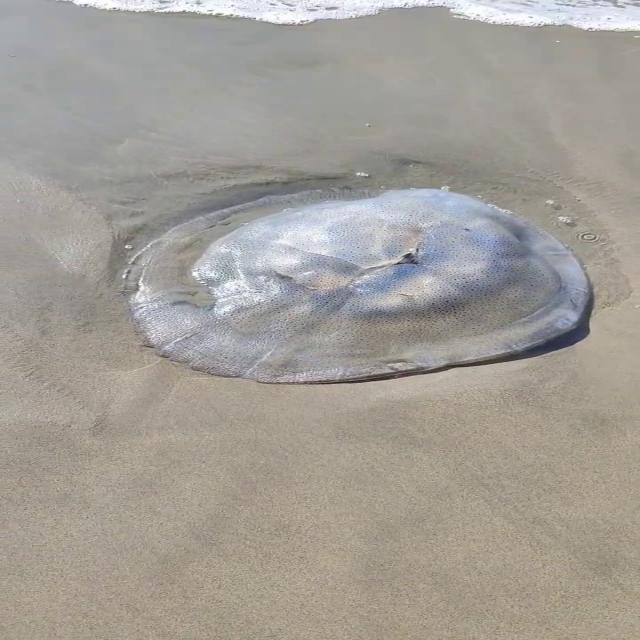

In [ ]:
from IPython.display import Image as show_image# ipynb 파일의 cell에서 이미지를 시각화하기 위한 라이브러리
show_image('/content/test/images/frame_-Jellyfish-Fish-Sea-Beach-mp4_frame_0003_jpg.rf.fa163571b373bf8d3333c542a97c87fb.jpg')

In [ ]:
project = ".find-jellyfish"
name = "jelly fish"

dataset_path = "data.yaml"

In [ ]:
model = YOLO('yolov8n.pt') #yolov8n(나노), yolov8s(스몰), yolov8m(미디움), yolov8l(라지), yolov8x(엑스트라) 등이 있음

100%|██████████| 6.25M/6.25M [00:00<00:00, 133MB/s]


In [ ]:
# train: '/content/train/images'
# val: '/content/valid/images'
# train_images_path ='/content/train/images'
# val_images_path = '/content/valid/images'

train_images_path = '/content/train/images'
# 1. 이미지 파일 경로 찾기
train_image_files = glob.glob(os.path.join(train_images_path, "*.jpg")) + \
                    glob.glob(os.path.join(train_images_path, "*.png")) + \
                    glob.glob(os.path.join(train_images_path, "*.jpeg"))
train_image_files

Train images found: 868
Validation images found: 83


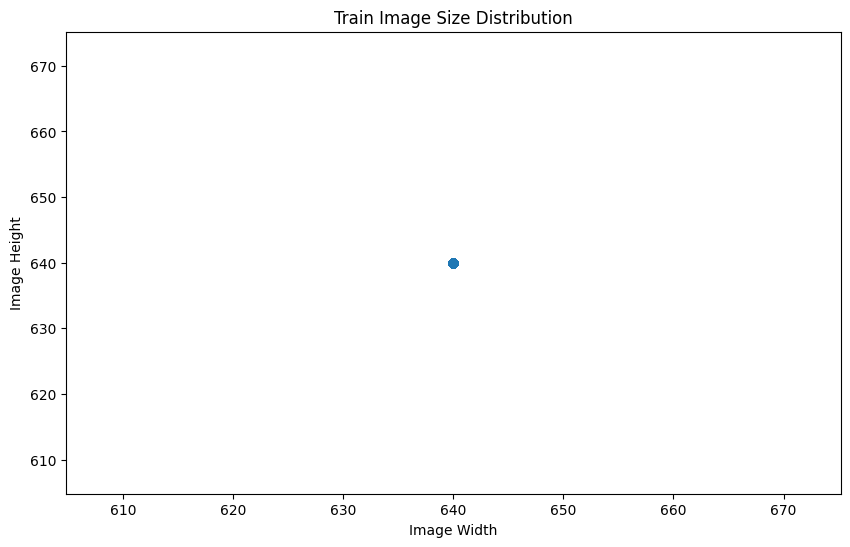

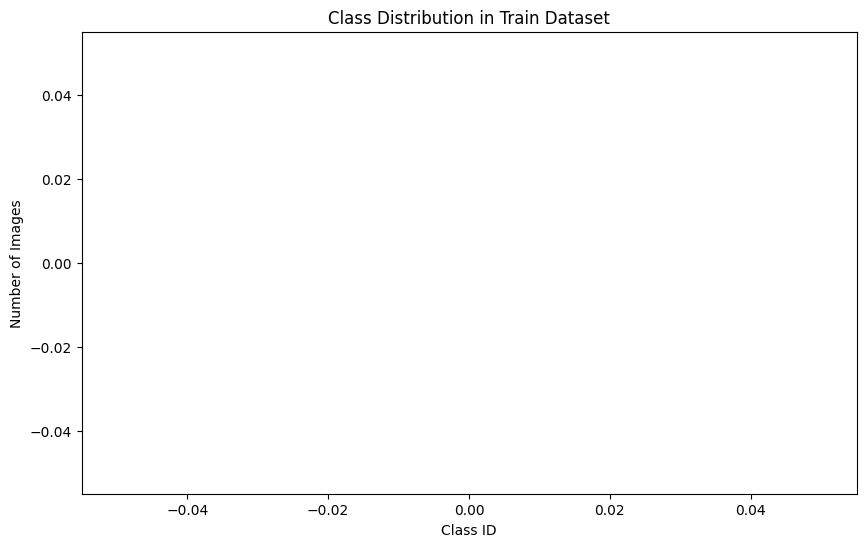

In [ ]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from collections import Counter
import yaml
from IPython.display import Image as show_image
import random

# 데이터셋 경로 설정 (data.yaml 파일을 통해 경로 로드)
dataset_path = "/content/data.yaml"  # 실제 경로로 수정
with open(dataset_path, 'r') as f:
    dataset_info = yaml.safe_load(f)

train_images_path ='/content/train/images'
val_images_path = '/content/valid/images'

# 1. 이미지 파일 경로 찾기
train_image_files = glob.glob(os.path.join(train_images_path, "*.jpg")) + \
                    glob.glob(os.path.join(train_images_path, "*.png")) + \
                    glob.glob(os.path.join(train_images_path, "*.jpeg"))

val_image_files = glob.glob(os.path.join(val_images_path, "*.jpg")) + \
                  glob.glob(os.path.join(val_images_path, "*.png")) + \
                  glob.glob(os.path.join(val_images_path, "*.jpeg"))

print(f"Train images found: {len(train_image_files)}")
print(f"Validation images found: {len(val_image_files)}")

# 2. 이미지 크기 분석
image_sizes = []
for image_file in train_image_files:
    try:
        with Image.open(image_file) as img:
            image_sizes.append(img.size)
    except Exception as e:
        print(f"Error opening image {image_file}: {e}")

# 이미지 크기 (너비, 높이) 분포
if image_sizes:
    widths, heights = zip(*image_sizes)
    plt.figure(figsize=(10,6))
    plt.scatter(widths, heights, alpha=0.5)
    plt.xlabel("Image Width")
    plt.ylabel("Image Height")
    plt.title("Train Image Size Distribution")
    plt.show()
else:
    print("No valid images found in train dataset.")

# 3. 레이블 분포 분석 (주석 처리된 부분은 실제 레이블 데이터를 로드하여 분석)
# 레이블 파일 경로
label_files = glob.glob(os.path.join(train_images_path, "*.txt"))
class_labels = []

# 레이블 파일을 읽어서 클래스 정보를 수집합니다.
for label_file in label_files:
    with open(label_file, 'r') as f:
        for line in f.readlines():
            class_id = int(line.split()[0])  # 첫 번째 값이 클래스 ID
            class_labels.append(class_id)

# 클래스 분포 확인
class_counts = Counter(class_labels)
classes = list(class_counts.keys())
counts = list(class_counts.values())

# 클래스 분포 시각화
plt.figure(figsize=(10,6))
plt.bar(classes, counts, alpha=0.7)
plt.xlabel("Class ID")
plt.ylabel("Number of Images")
plt.title("Class Distribution in Train Dataset")
plt.show()

# 예시 이미지 보기 (무작위로 이미지 하나 표시)
if train_image_files:
    sample_image = random.choice(train_image_files)
    show_image(sample_image, width=800)
else:
    print("No images found for display.")


In [ ]:
model.train(
    data=dataset_path, # 데이터셋 경로(yaml파일)
    epochs=30, # 최대 학습 epoch
    project=project, # project 폴더 이름
    name=name, # experiment 폴더 이름
    exist_ok=False, # 덮어쓰기 여부
    seed=42, # 재현성을 위한 시드 설정
    optimizer='AdamW', # optimizer는 AdamW로 지정
    patience=5, # 30epoch동안 loss가 개선되지 않으면 종료
    batch=32, # 훈련 배치 사이즈는 16
    imgsz=832, # 이미지 사이즈는 832
    degrees=0.15, # 이미지 회전 -15'~15'
    fliplr= 1 # 이미지 좌우 반전 확률은 0으로 지정 ("2"와 "5" 혼동을 막기 위함)
)

Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=.find-jellyfish/jelly fish/weights/best.pt, data=/content/data.yaml, epochs=30, time=None, patience=5, batch=32, imgsz=832, save=True, save_period=-1, cache=False, device=None, workers=8, project=.find-jellyfish, name=jelly fish3, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, sho

train: Scanning /content/train/labels.cache... 868 images, 32 backgrounds, 0 corrupt: 100%|██████████| 868/868 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/valid/labels.cache... 83 images, 2 backgrounds, 0 corrupt: 100%|██████████| 83/83 [00:00<?, ?it/s]


Plotting labels to .find-jellyfish/jelly fish3/labels.jpg... 
optimizer: AdamW(lr=0.01, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 832 train, 832 val
Using 2 dataloader workers
Logging results to .find-jellyfish/jelly fish3
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      7.64G      2.365      2.727      2.437         10        832: 100%|██████████| 28/28 [00:35<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.81it/s]

                   all         83        130     0.0587      0.101     0.0213    0.00662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30       7.6G      2.095      2.334      2.239         10        832: 100%|██████████| 28/28 [00:27<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.60it/s]

                   all         83        130     0.0581      0.138     0.0211    0.00654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      7.37G      2.056      2.306      2.191         14        832: 100%|██████████| 28/28 [00:31<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.69it/s]

                   all         83        130     0.0793      0.108     0.0339    0.00889



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      7.89G      2.056      2.259       2.18          3        832: 100%|██████████| 28/28 [00:27<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.18it/s]

                   all         83        130      0.338      0.231        0.2     0.0552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      7.37G      2.083      2.272      2.201         33        832: 100%|██████████| 28/28 [00:29<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.72it/s]

                   all         83        130     0.0818      0.254      0.069     0.0175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      7.42G      1.989       2.19      2.155         15        832: 100%|██████████| 28/28 [00:27<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.05it/s]

                   all         83        130      0.271      0.277      0.231     0.0663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      7.52G      1.921      2.148      2.086         32        832: 100%|██████████| 28/28 [00:28<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.62it/s]

                   all         83        130      0.361      0.462      0.325     0.0993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      7.88G      1.928      2.073      2.103         24        832: 100%|██████████| 28/28 [00:28<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.05it/s]

                   all         83        130      0.388      0.485      0.349     0.0967



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      7.29G      1.967      2.026      2.043         50        832: 100%|██████████| 28/28 [00:27<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]

                   all         83        130      0.359      0.592      0.413      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      7.98G      1.889       1.98      2.025          8        832: 100%|██████████| 28/28 [00:30<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.32it/s]

                   all         83        130      0.395      0.492      0.388      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      8.23G      1.925      1.934      2.011          9        832: 100%|██████████| 28/28 [00:27<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]

                   all         83        130      0.416      0.538      0.418      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      7.83G      1.878      1.944      1.982          7        832: 100%|██████████| 28/28 [00:31<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.70it/s]

                   all         83        130      0.532      0.538      0.487      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      8.27G      1.848       1.84       1.94         22        832: 100%|██████████| 28/28 [00:27<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.20it/s]

                   all         83        130      0.484      0.534      0.509      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      7.47G      1.799      1.833      1.969          7        832: 100%|██████████| 28/28 [00:30<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.72it/s]

                   all         83        130      0.456      0.523      0.457      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      7.77G       1.83      1.845       1.95          9        832: 100%|██████████| 28/28 [00:27<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.06it/s]

                   all         83        130      0.573      0.585      0.557      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      7.37G      1.759      1.774      1.915          8        832: 100%|██████████| 28/28 [00:29<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.77it/s]

                   all         83        130      0.622      0.577      0.607      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      7.49G      1.758      1.764      1.911          5        832: 100%|██████████| 28/28 [00:28<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.03it/s]

                   all         83        130      0.485      0.595      0.505      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      7.32G      1.723      1.727      1.915          8        832: 100%|██████████| 28/28 [00:27<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.56it/s]

                   all         83        130       0.59      0.492      0.561      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      7.42G      1.736      1.703      1.871         14        832: 100%|██████████| 28/28 [00:31<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.04it/s]

                   all         83        130      0.669      0.622      0.638      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      8.05G      1.746      1.665      1.878          6        832: 100%|██████████| 28/28 [00:27<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.67it/s]

                   all         83        130       0.66      0.623      0.668      0.243


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      7.64G      1.871      1.764      2.095          4        832: 100%|██████████| 28/28 [00:34<00:00,  1.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.74it/s]

                   all         83        130      0.601      0.614      0.622      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      7.26G      1.801      1.606      2.045          6        832: 100%|██████████| 28/28 [00:27<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.04it/s]

                   all         83        130      0.606      0.638      0.638      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      7.04G      1.738      1.534      1.984          4        832: 100%|██████████| 28/28 [00:27<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.71it/s]

                   all         83        130       0.68      0.669      0.664      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      7.32G      1.771      1.517      2.029          4        832: 100%|██████████| 28/28 [00:26<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.19it/s]

                   all         83        130      0.611      0.692      0.665      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30         7G      1.706      1.463      1.978          4        832: 100%|██████████| 28/28 [00:27<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.78it/s]

                   all         83        130      0.724      0.625      0.691      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      7.37G      1.748      1.454      1.957          4        832: 100%|██████████| 28/28 [00:26<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.26it/s]

                   all         83        130      0.701      0.649      0.714      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      7.32G      1.682      1.425      1.956          4        832: 100%|██████████| 28/28 [00:29<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.90it/s]

                   all         83        130      0.602      0.743       0.69      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      7.04G      1.694      1.395      1.933          4        832: 100%|██████████| 28/28 [00:26<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.45it/s]

                   all         83        130      0.764      0.754      0.769      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      7.29G      1.689      1.363      1.904         17        832: 100%|██████████| 28/28 [00:30<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]

                   all         83        130      0.739      0.761      0.745       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      7.32G      1.698      1.339      1.921          4        832: 100%|██████████| 28/28 [00:26<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.79it/s]

                   all         83        130      0.713      0.738       0.74      0.338



30 epochs completed in 0.277 hours.
Optimizer stripped from .find-jellyfish/jelly fish3/weights/last.pt, 6.3MB
Optimizer stripped from .find-jellyfish/jelly fish3/weights/best.pt, 6.3MB

Validating .find-jellyfish/jelly fish3/weights/best.pt...
Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.46it/s]


                   all         83        130      0.711      0.738      0.741      0.338
Speed: 0.5ms preprocess, 3.9ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to .find-jellyfish/jelly fish3


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f7d75a87130>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [ ]:
#/content/test

In [ ]:
#/content/train

In [ ]:
#/content/valid

In [ ]:
os.path.abspath(f"{project}/{name}/results.png")

'/content/.find-jellyfish/jelly fish/results.png'

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

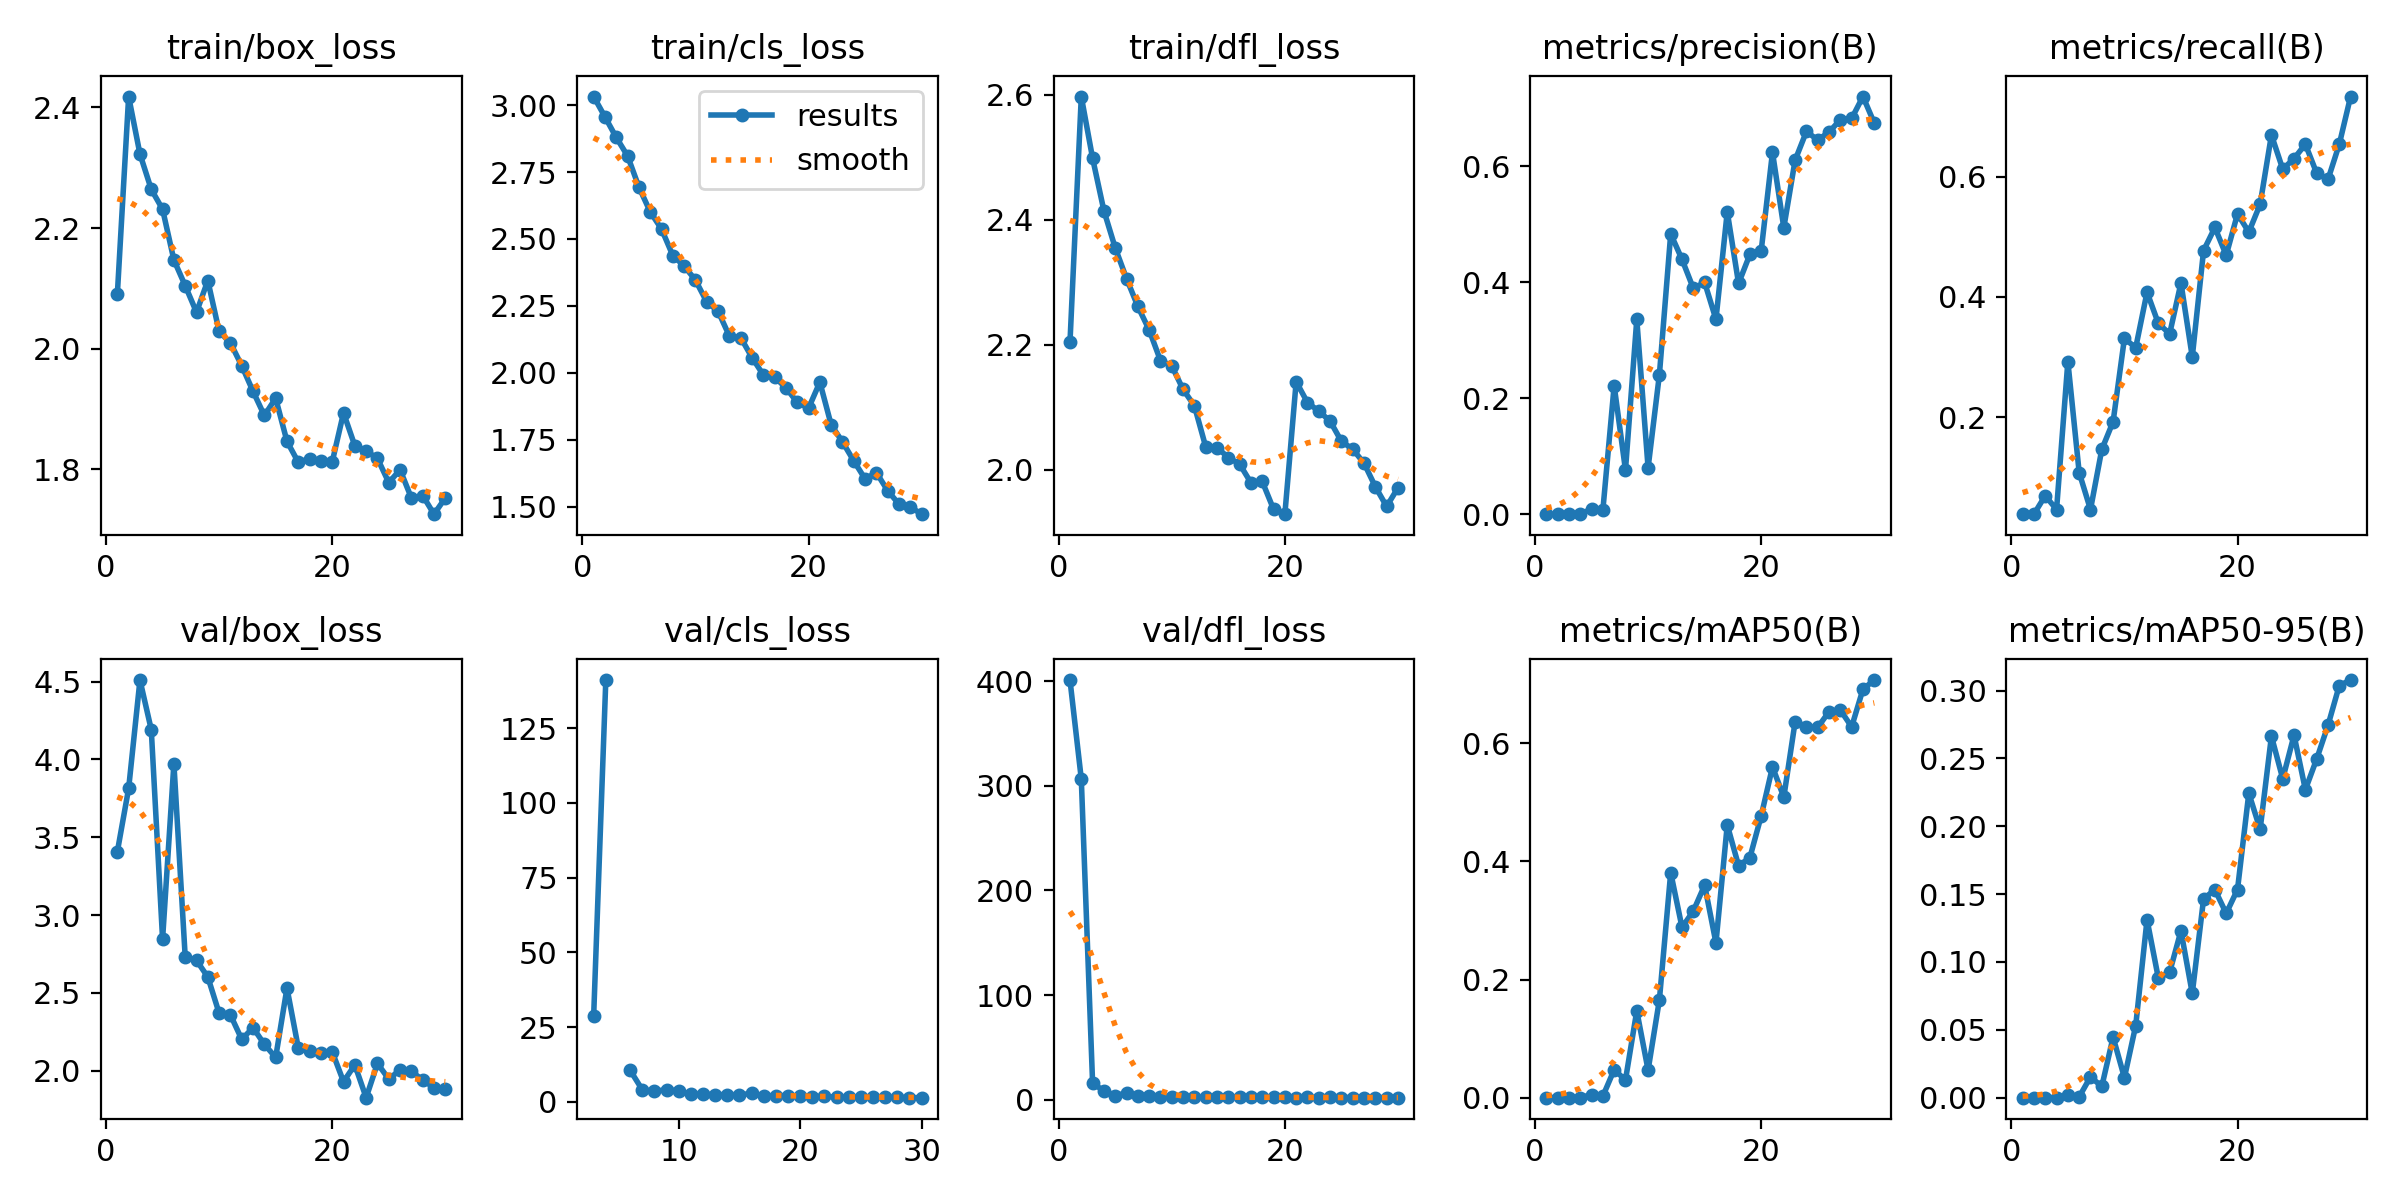

In [ ]:
show_image(f"{project}/{name}/results.png", width=800)

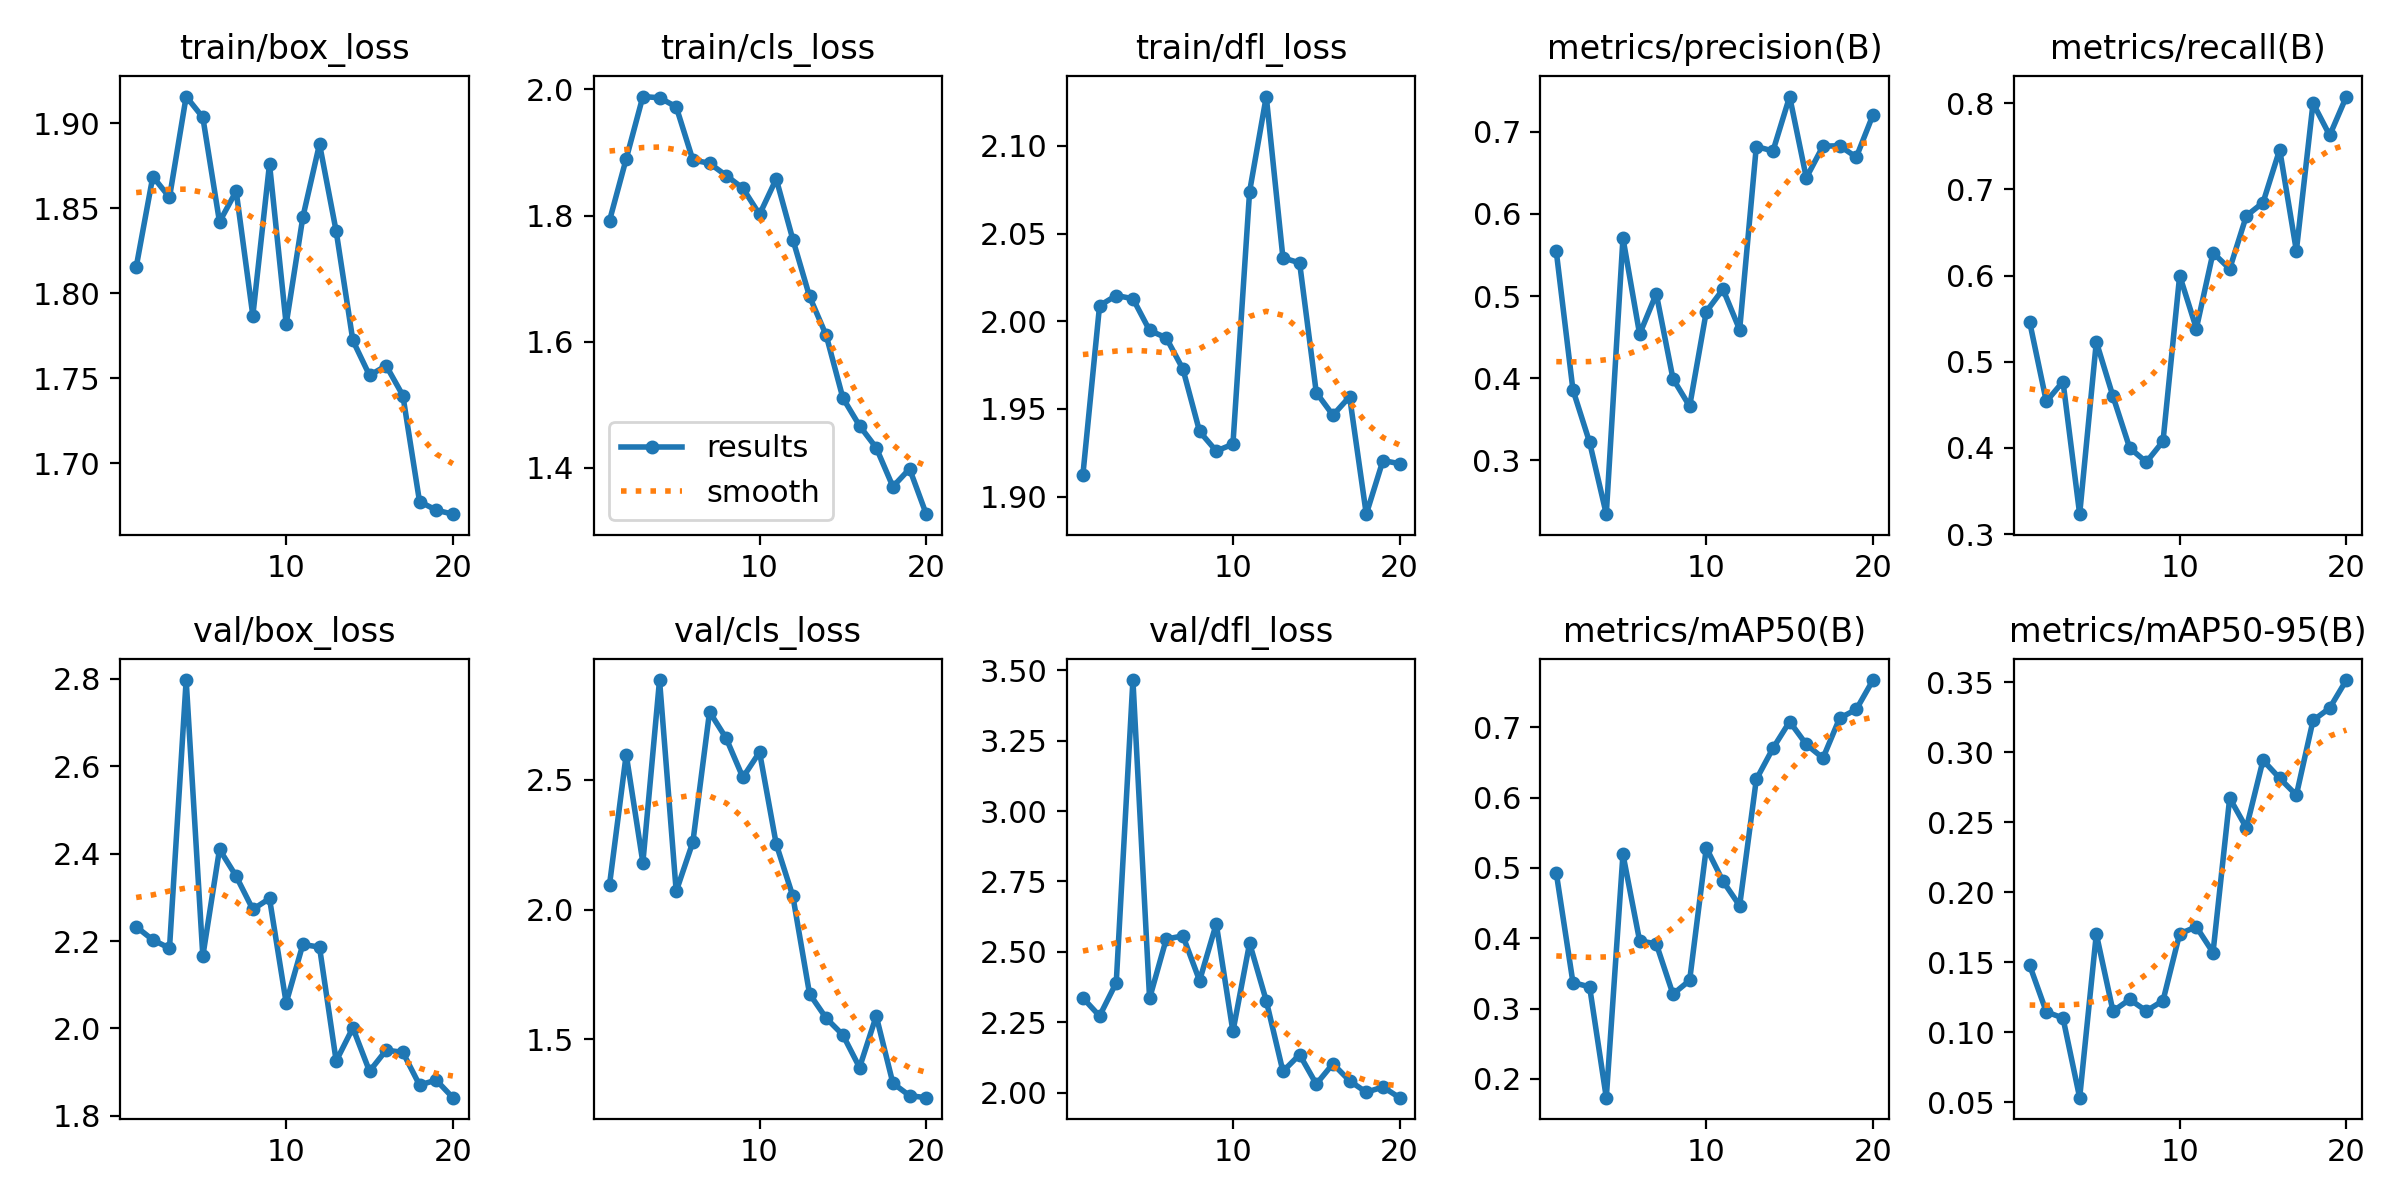

In [ ]:
show_image("/content/.find-jellyfish/jelly fish2/results.png", width=800)

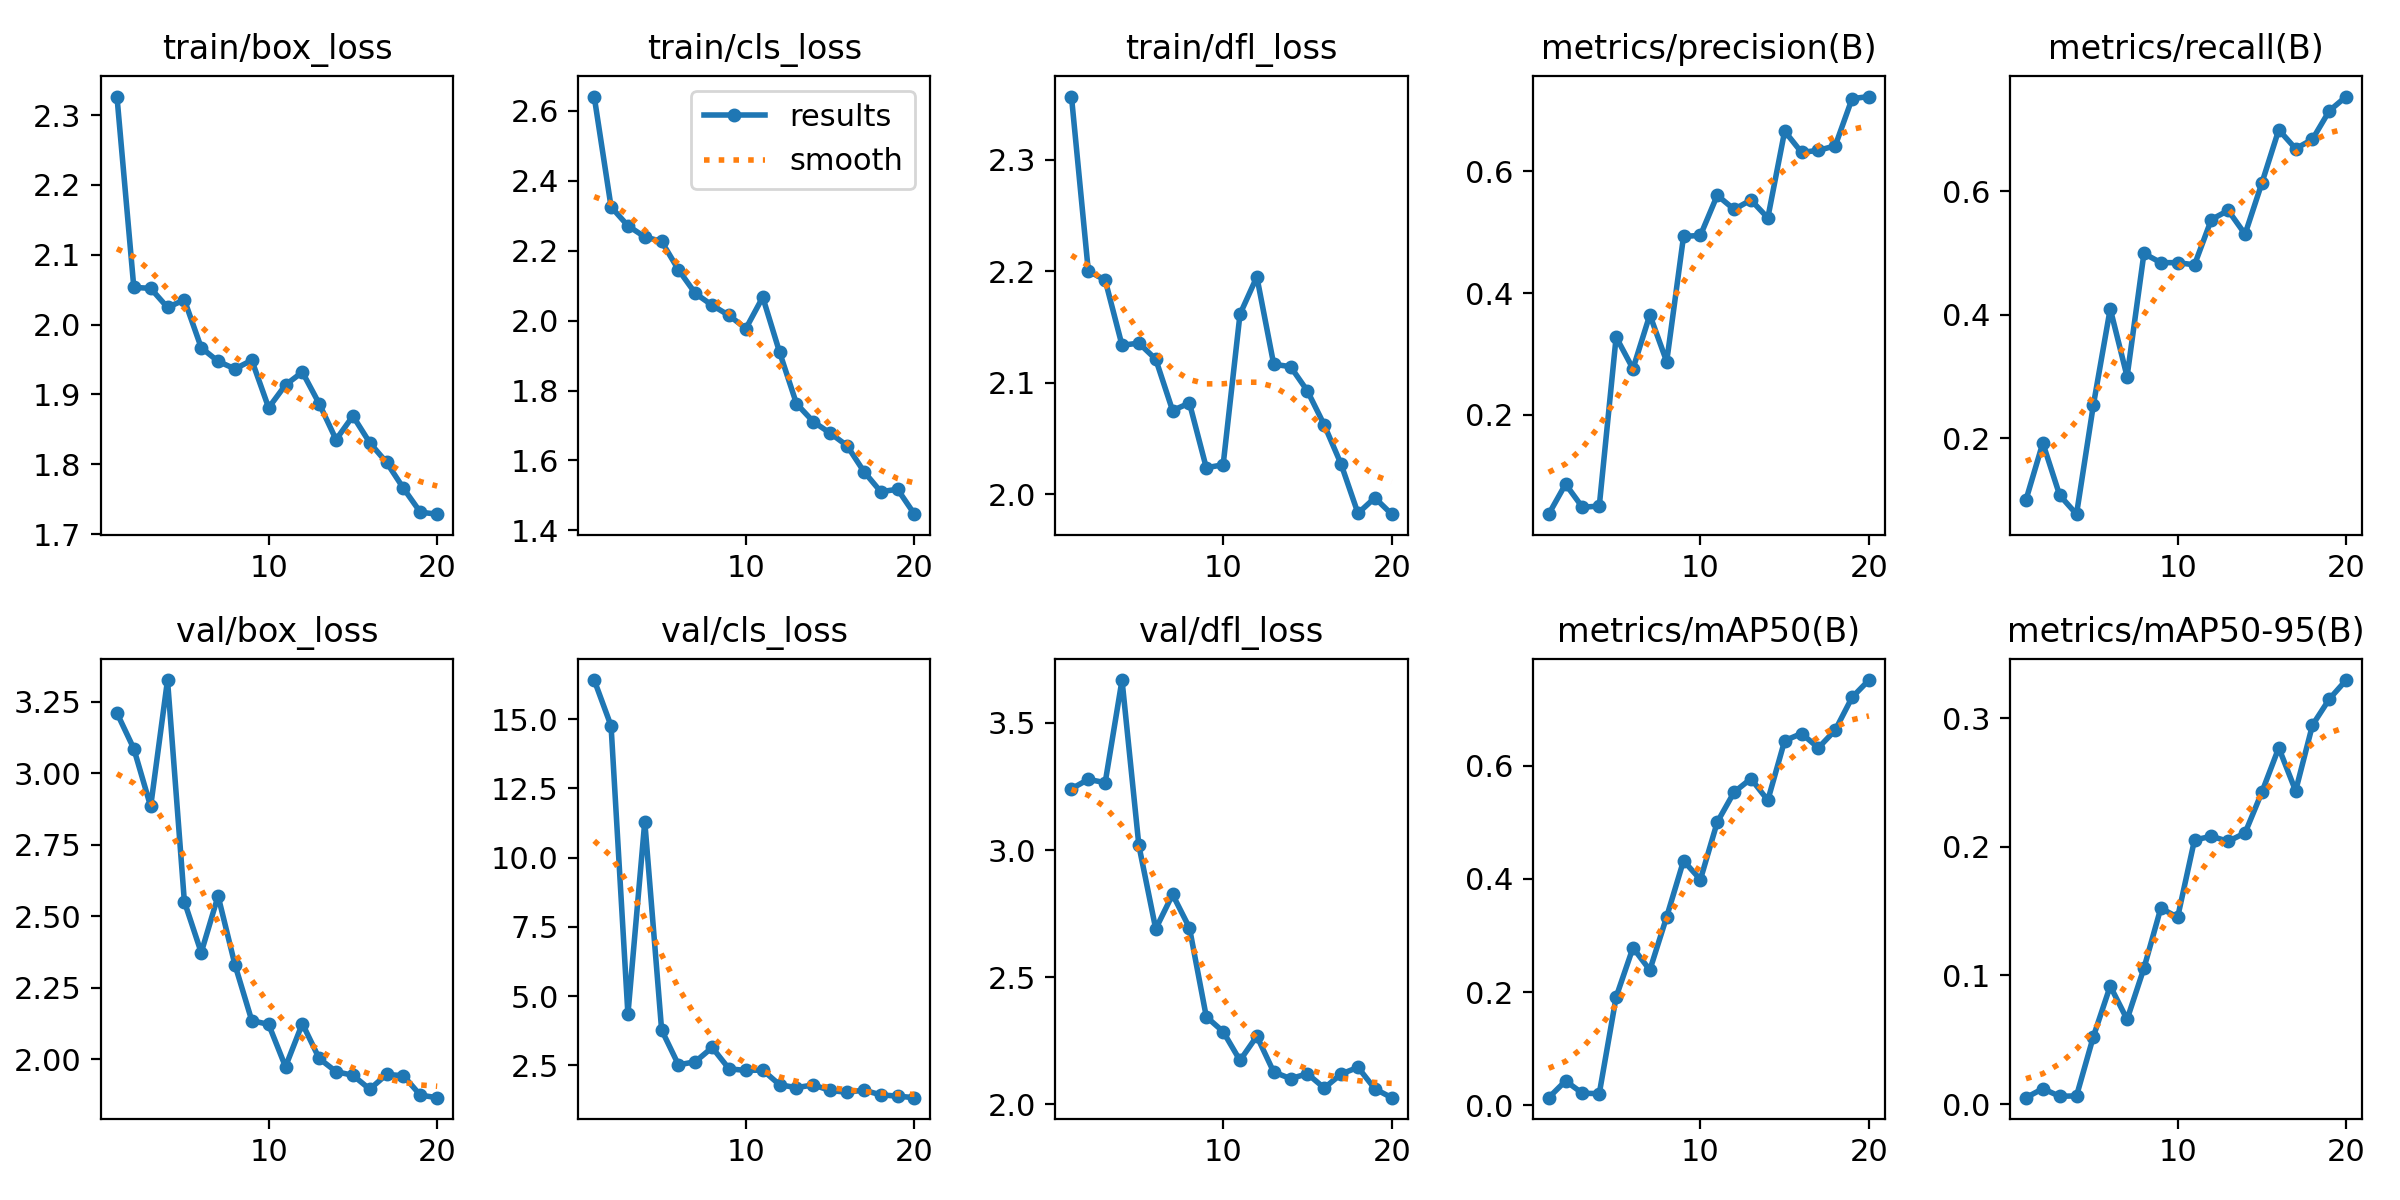

In [ ]:
show_image("/content/.find-jellyfish/jelly fish3/results.png", width=800)


image 1/47 /content/test/images/27_jpg.rf.d789162dd5783c259c5853ffc27a019e.jpg: 832x832 1 jelly fish, 16.3ms
image 2/47 /content/test/images/33_jpg.rf.fb388f0c26f19d69514f2beee7ff1b28.jpg: 832x832 1 jelly fish, 10.8ms
image 3/47 /content/test/images/38_jpg.rf.de814f3bdec597b55db7d0bfcbfec492.jpg: 832x832 2 jelly fishs, 10.8ms
image 4/47 /content/test/images/47_jpg.rf.6ae88a7e2d23fdb081c0f958ba59036e.jpg: 832x832 4 jelly fishs, 10.8ms
image 5/47 /content/test/images/69_jpg.rf.6d1d41590c6fd6d9dfd052b02f5c59bb.jpg: 832x832 2 jelly fishs, 10.8ms
image 6/47 /content/test/images/aug-12-20_jpg.rf.542d515af4827f4146a0af6154c882fe.jpg: 832x832 1 jelly fish, 10.8ms
image 7/47 /content/test/images/aug-20-31_jpg.rf.cff55f5c01fcd67eef8adb37a29e5efc.jpg: 832x832 (no detections), 10.8ms
image 8/47 /content/test/images/aug-23-29_jpg.rf.c58d0141e2fe12f4ccc7b3d926f0e8a8.jpg: 832x832 1 jelly fish, 11.4ms
image 9/47 /content/test/images/aug-32-40_jpg.rf.776d1c72be4ff8c47a9ebf06808089a1.jpg: 832x832 1 jel

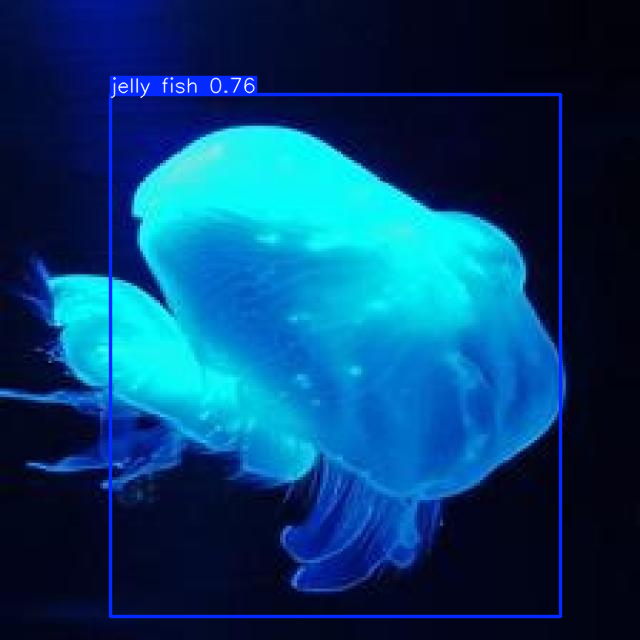

Class: jelly fish, Coordinates: tensor([335.8960, 355.3932, 449.8952, 521.8830], device='cuda:0')


In [ ]:
from ultralytics import YOLO

# 훈련된 모델 로드
model = YOLO("/content/.find-jellyfish/jelly fish3/weights/best.pt")

# 테스트 이미지 경로 (디렉토리에서 여러 이미지를 테스트하려면 경로를 지정할 수 있음)
test_image_path = "/content/test/images/*"  # 모든 이미지 파일을 예측 대상으로 지정

# 모델 예측
results = model(test_image_path)

# 예측 결과 출력 (첫 번째 예시만 시각화)
results[0].show()  # 첫 번째 이미지 예측 결과 시각화

# 예측된 객체의 좌표 및 클래스 정보 출력
boxes = results[0].boxes  # 첫 번째 이미지 예측 결과의 객체 박스
class_ids = boxes.cls  # 클래스 ID
coordinates = boxes.xywh  # 객체의 좌표 (xywh 형식)

# 객체의 클래스 이름과 좌표 출력
for cls, coord in zip(class_ids, coordinates):
    class_name = results[0].names[int(cls)]  # 클래스 이름
    print(f"Class: {class_name}, Coordinates: {coord}")

# 성능 지표 (Precision, Recall, F1-Score 등)을 직접 계산하려면 실제 정답과 예측을 비교해야 함
# 예를 들어, 예측 결과를 ground truth와 비교하여 성능을 측정할 수 있음.
# 이 부분은 별도의 코드나 라이브러리를 사용하여 성능 평가 지표를 계산할 수 있습니다.




image 1/1 /content/frame_해파리.mp4_frame_0002.jpg: 480x832 2 jelly fishs, 7.9ms
Speed: 2.3ms preprocess, 7.9ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 832)


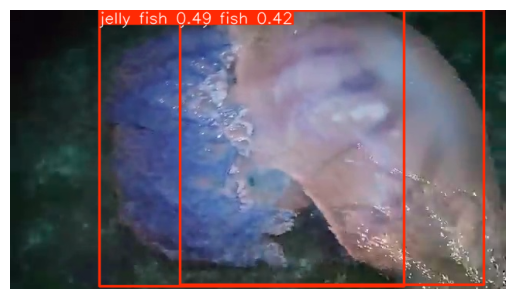

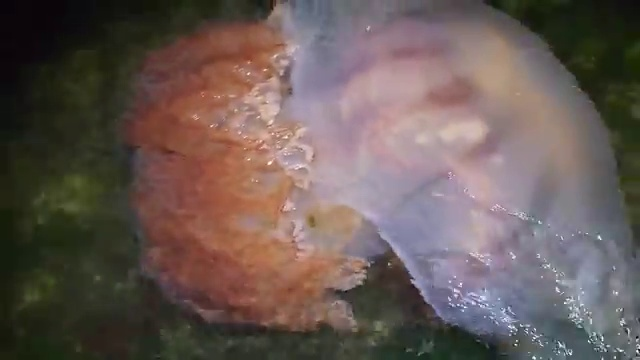

In [ ]:
import os
from PIL import Image
from ultralytics import YOLO
from IPython.display import Image as show_image
import matplotlib.pyplot as plt

# 훈련된 모델 로드 (best.pt는 훈련 후 저장된 모델 가중치 파일)
model = YOLO(f'{project}/{name}/weights/best.pt')  # 프로젝트 경로에 맞게 수정

# 예측하고자 하는 이미지 경로
test_image_path = "/content/frame_해파리.mp4_frame_0002.jpg"  # 라벨링되지 않은 이미지 경로

# 모델을 사용하여 예측
results = model(test_image_path)  # 이미지 경로를 넣어서 예측 진행

# 예측 결과 시각화
# 결과는 리스트 형태로 반환되므로 첫 번째 예측 결과만 사용
result_image = results[0].plot()  # plot() 메서드로 이미지를 바로 시각화

# 예측 결과 이미지 시각화
plt.imshow(result_image)
plt.axis('off')  # 축 숨기기
plt.show()

# 결과 이미지를 Colab에서 바로 확인하기 위해 출력
show_image(test_image_path, width=800)
